# **Assignment : Anime Recommendation System**

- ณัฐพนธ์ สุขถาวร 62010278
- นิธิ น้อมประวัติ 62010497
- พักตร์ภูมิ ตาแพร่ 62010609
- สิรวิชญ์ สุขวัฒนาวิทย์ 62010948

## **Import Libraries**

In [575]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Global Config**

In [576]:
sns.set_theme(style="whitegrid", palette="pastel")

class CONFIG:
    PLT_FIG_SIZE = plt.figaspect(8/19)

# color codes for python build-in print functions
class PRINT_COLOR_CODE:
    BLUE = '\033[94m'
    CYAN = '\033[96m'
    GREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC = '\033[0m'

## **Define Utils Functions**

In [577]:
# function to get name of columns which contained Nan value
def get_cols_with_na(df):
    masked_na_df = df.isna()
    cols_with_na = df.columns[masked_na_df.any()].tolist()
    return cols_with_na

## **Import Datasets**

In [578]:
ANIME_CSV_PATH = "./datasets/anime.csv"
RATING_CSV_PATH = "./datasets/rating.csv"

In [579]:
anime_df = pd.read_csv(ANIME_CSV_PATH)
rating_df = pd.read_csv(RATING_CSV_PATH)

## **Data Process**

In [580]:
anime_df.rename(columns={'rating': 'average_rating'},inplace=True)

anime_df

,anime_id,name,genre,type,episodes,average_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [581]:
rating_df.rename(columns={'rating': 'user_rating'},inplace=True)

rating_df

,user_id,anime_id,user_rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [582]:
rating_merged_df = rating_df.merge(anime_df, on='anime_id', how='inner')

rating_merged_df

,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
7813722,65682,30450,8,Dr. Slump: Hoyoyo! Arale no Himitsu Dai Koukai...,"Comedy, Sci-Fi, Shounen",Special,1,6.17,248
7813723,69497,33484,10,Shiroi Zou,"Action, Historical, Kids",Movie,1,4.71,45
7813724,70463,29481,-1,Kakinoki Mokkii,"Fantasy, Kids",Special,1,4.33,61
7813725,72404,34412,-1,Hashiri Hajimeta bakari no Kimi ni,Music,Music,1,6.76,239


## **Data Exploration (1)**

### 1. **Anime Dataframe** Basic Info.

In [583]:
anime_df.info()
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_with_na(anime_df)}{PRINT_COLOR_CODE.ENDC}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        12294 non-null  int64  
 1   name            12294 non-null  object 
 2   genre           12232 non-null  object 
 3   type            12269 non-null  object 
 4   episodes        12294 non-null  object 
 5   average_rating  12064 non-null  float64
 6   members         12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB

List of columns that contain NaN values : ['genre', 'type', 'average_rating']


,anime_id,average_rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


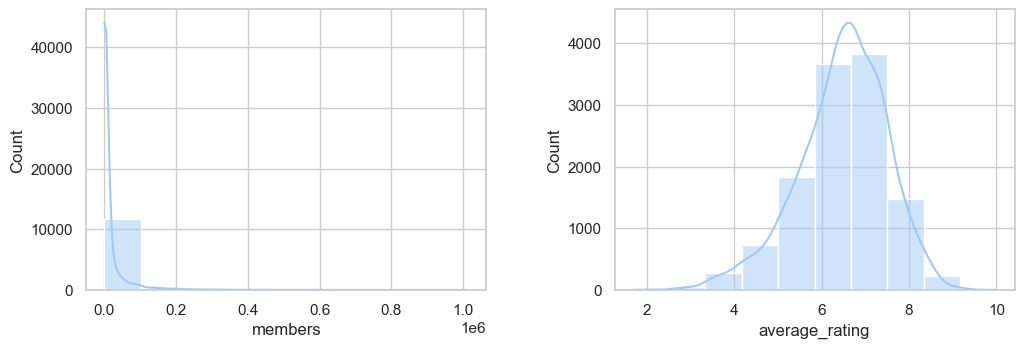

In [584]:
fig, axs = plt.subplots(ncols=2,figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(anime_df, x='members', kde=True, bins=10, ax=axs[0])
sns.histplot(anime_df, x='average_rating', kde=True, bins=10, ax=axs[1])

anime_df.describe()

### 2. **Rating Dataframe** Basic info.

In [585]:
rating_df.info()
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_with_na(rating_df)}{PRINT_COLOR_CODE.ENDC}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column       Dtype
---  ------       -----
 0   user_id      int64
 1   anime_id     int64
 2   user_rating  int64
dtypes: int64(3)
memory usage: 178.8 MB

List of columns that contain NaN values : []


,user_id,anime_id,user_rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


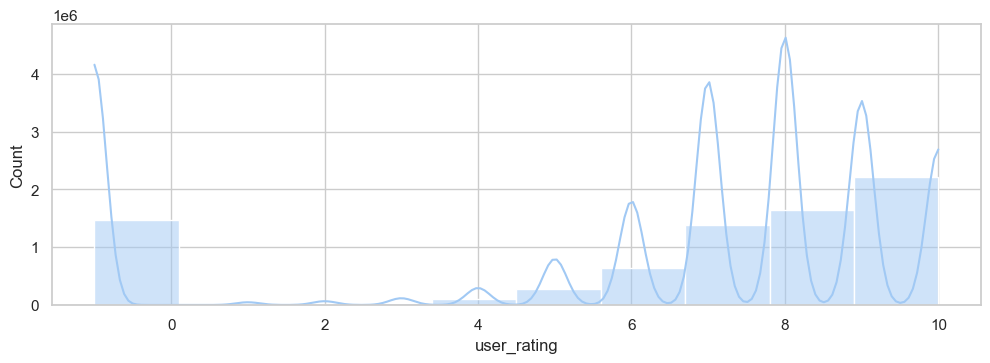

In [586]:
fig, axs = plt.subplots(ncols=1,figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(rating_df, x='user_rating', kde=True, bins=10, ax=axs)

rating_df.describe()

### 3. **Rating Merged Dataframe** Basic Info.

In [587]:
rating_merged_df.info()
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_with_na(rating_merged_df)}{PRINT_COLOR_CODE.ENDC}')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813727 entries, 0 to 7813726
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         int64  
 1   anime_id        int64  
 2   user_rating     int64  
 3   name            object 
 4   genre           object 
 5   type            object 
 6   episodes        object 
 7   average_rating  float64
 8   members         int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 596.1+ MB

List of columns that contain NaN values : ['genre', 'type', 'average_rating']


### 4. Compare **Anime Dataframe** vs **Rating Merged Dataframe**

In [588]:
rating_merged_droped_unrated_user_df = rating_merged_df.drop(
    rating_merged_df[rating_merged_df['user_rating'] < 0].index)

compare_anime_vs_rating_merged_df = rating_merged_droped_unrated_user_df.groupby(['anime_id']).agg({
    'members': 'mean',
    'user_id': 'count',
    'average_rating': 'mean',
    'user_rating': 'mean',
})
compare_anime_vs_rating_merged_df.rename(
    columns={
        'user_id': 'rating_merged: members (cal)',
        'user_rating': 'rating_merged: average_rating (cal)',
        'members': 'anime: members',
        'average_rating': 'anime: average_rating'
    },
    inplace=True)

print(f'{PRINT_COLOR_CODE.WARNING}Anime Dataframe vs Rating Merged Dataframe (droped users who have not rated anime){PRINT_COLOR_CODE.ENDC}\n')
print(
    f'{PRINT_COLOR_CODE.CYAN}Anime Dataframe{PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{anime_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')
print(
    f'{PRINT_COLOR_CODE.CYAN}Rating Merged Dataframe (droped users who have not rated anime){PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{compare_anime_vs_rating_merged_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')

compare_anime_vs_rating_merged_df


Anime Dataframe vs Rating Merged Dataframe (droped users who have not rated anime)

Anime Dataframe contains 12294 unique animes
Rating Merged Dataframe (droped users who have not rated anime) contains 9926 unique animes


,anime: members,rating_merged: members (cal),anime: average_rating,rating_merged: average_rating (cal)
anime_id,,,,
1,486824.0,13449,8.82,8.869433
5,137636.0,5790,8.40,8.439724
6,283069.0,9385,8.32,8.419393
7,64905.0,2169,7.36,7.533426
8,9848.0,308,7.06,7.198052
...,...,...,...,...
34324,817.0,11,5.40,5.909091
34325,1454.0,15,7.05,7.333333
34349,1885.0,3,7.25,7.000000


## **Data Cleansing**

In Rating Merged DataFrame, replace all instances of `user_rating` with `average_rating` for rows where user_rating == -1 (unrated anime)."

In [ ]:
rating_merged_df['user_rating'] = rating_merged_df.apply(lambda x: x['user_rating'] if x['user_rating'] > -1 else x['average_rating'], axis=1)

rating_merged_df.reset_index(inplace=True)
rating_merged_df

## **Data Exploration (2)**

### 1. Compare **Anime Dataframe** vs **Rating Merged Dataframe**

In [594]:
rating_merged_replaced_unrated_user_df = rating_merged_df.drop(
    rating_merged_df[rating_merged_df['user_rating'] < 0].index)

compare_anime_vs_rating_merged_df = rating_merged_replaced_unrated_user_df.groupby(['anime_id']).agg({
    'members': 'mean',
    'user_id': 'count',
    'average_rating': 'mean',
    'user_rating': 'mean',
})
compare_anime_vs_rating_merged_df.rename(
    columns={
        'user_id': 'rating_merged: members (cal)',
        'user_rating': 'rating_merged: average_rating (cal)',
        'members': 'anime: members',
        'average_rating': 'anime: average_rating'
    },
    inplace=True)

print(f'{PRINT_COLOR_CODE.WARNING}Anime Dataframe vs Rating Merged Dataframe (after assigning average rating intead of user rating for users who have not rated anime){PRINT_COLOR_CODE.ENDC}\n')
print(
    f'{PRINT_COLOR_CODE.CYAN}Anime Dataframe{PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{anime_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')
print(
    f'{PRINT_COLOR_CODE.CYAN}Rating Merged Dataframe (after assigning average rating intead of user rating for users who have not rated anime){PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{compare_anime_vs_rating_merged_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')

compare_anime_vs_rating_merged_df


Anime Dataframe vs Rating Merged Dataframe (after assigning average rating intead of user rating for users who have not rated anime)

Anime Dataframe contains 12294 unique animes
Rating Merged Dataframe (after assigning average rating intead of user rating for users who have not rated anime) contains 11197 unique animes


,anime: members,rating_merged: members (cal),anime: average_rating,rating_merged: average_rating (cal)
anime_id,,,,
1,486824.0,15509,8.82,8.862867
5,137636.0,6927,8.40,8.433203
6,283069.0,11077,8.32,8.404211
7,64905.0,2629,7.36,7.503081
8,9848.0,413,7.06,7.162954
...,...,...,...,...
34367,582.0,5,5.97,5.394000
34412,239.0,1,6.76,6.760000
34475,313.0,4,6.58,6.645000


### 2. **Anime Dataframe** Top 10 Members and Top 10 Average Rating

[Text(0, 0, 'Taka no Tsume 8: Yoshida-kun no X-Files'),
 Text(1, 0, 'Spoon-hime no Swing Kitchen'),
 Text(2, 0, 'Mogura no Motoro'),
 Text(3, 0, 'Kimi no Na wa.'),
 Text(4, 0, 'Kahei no Umi'),
 Text(5, 0, 'Fullmetal Alchemist: Brotherhood'),
 Text(6, 0, 'Gintama°'),
 Text(7, 0, 'Yakusoku: Africa Mizu to Midori'),
 Text(8, 0, 'Steins;Gate'),
 Text(9, 0, 'Gintama&#039;')]

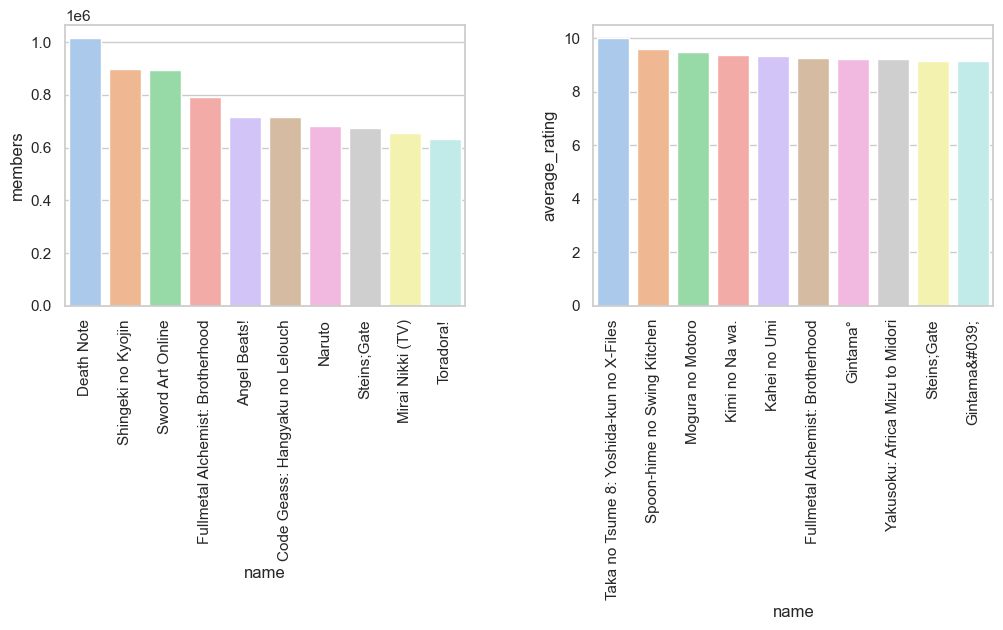

In [598]:
anime_top_10_members_df = anime_df.sort_values(
    by='members', ascending=False).head(10)
anime_top_10_rating_df = anime_df.sort_values(
    by='average_rating', ascending=False).head(10)

fig, axs = plt.subplots(ncols=2, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

plt_0 = sns.barplot(data=anime_top_10_members_df, x='name',
                    y='members', order=anime_top_10_members_df['name'], ax=axs[0])
plt_0.set_xticklabels(plt_0.get_xticklabels(), rotation=90)

plt_1 = sns.barplot(data=anime_top_10_rating_df, x='name',
                    y='average_rating', order=anime_top_10_rating_df['name'], ax=axs[1])
plt_1.set_xticklabels(plt_1.get_xticklabels(), rotation=90)


## **Recommanded System (Content-based filtering)**

## **Recommanded System (Collaborative filtering)**

## Evaluation

### MAE (Mean Absolute Error)
- MAE = 1/n * Σ |y - y^|

### TOP-K
- Top-K = N/K
- N = 5
- K = 20

### AUC
- AUC = (n'+0.5n") / n